# Pymaceuticals Inc.
- This study represents a set of mice afflicted with tumors being offered various treatment regimens and observed over a period of time. 

### Analysis

- There was one mouse that had bad data from the original study that needed to be removed from the consideration of the final report. 
- Capomulin was the treatment offered most number of times in this study.
- Following Capomulin, Ramicane was the next treatment used most often in this study.
- The gender of the mice being treated were almost evenly distributed. 
- The most significant conclusion that can be drawn from this study is that the correlation between mouse weight and the average tumor volume is very high. This means that for the given set of mice in the study, higher the weight of the mice, higher is the volume if tumor observed in them. 
 

In [206]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"



In [207]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
print(mouse_metadata.shape)
mouse_metadata.head(3)

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15


In [208]:
study_results = pd.read_csv(study_results_path)
print(study_results.shape)
study_results.head(3)

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [209]:
# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29


In [68]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()

249

In [210]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_row_series=mouse_study.duplicated(subset=['Mouse ID','Timepoint'], keep=False)
bad_mice = mouse_study[duplicate_row_series]['Mouse ID'].unique()
bad_mice

array(['g989'], dtype=object)

In [71]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mouse_series = mouse_study['Mouse ID'].isin(bad_mice)
mouse_study[bad_mouse_series]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study[~bad_mouse_series]
print(clean_df.shape)
clean_df.head()

(1880, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [270]:
# Checking the number of mice in the clean DataFrame.
good_mice=clean_df['Mouse ID'].nunique()
print("The number of mice in the clean DataFrame are: ",good_mice)

The number of mice in the clean DataFrame are:  248


## Summary Statistics

In [74]:
#THIS IS THE FIRST HALF OF THE CODE BLOCK BELOW, JUST FOR REF OUTPUT VIEW
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_summary = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
drug_regimen_summary

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [219]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_summary = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_vol_median = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_vol_var = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_std = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_vol_sem = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_tumor_stat_summary_pd = pd.DataFrame({"Mean Tumor Volume":tumor_vol_mean, "Median Tumor Volume":tumor_vol_median,
                                         "Tumor Volume Variance":tumor_vol_var, "Tumor Volume Std. Dev.":tumor_vol_std,
                                         "Tumor Volume Std. Err.":tumor_vol_sem})
drug_tumor_stat_summary_pd

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [222]:
#Creating a stylized dataframe with the column labels alligning neatly with the column values.
drug_tumor_stat_summary_pd = drug_tumor_stat_summary_pd.style.set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'right')]
}])
drug_tumor_stat_summary_pd

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [223]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_summary = mouse_study.groupby('Drug Regimen').aggregate({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
print(tumor_vol_summary.shape)
tumor_vol_summary=tumor_vol_summary.style.set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'right')]
}])
tumor_vol_summary

(10, 5)


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

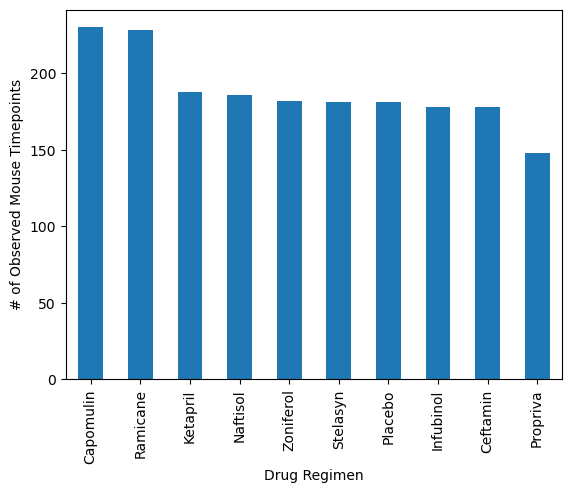

In [77]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_index_drugs = clean_df['Drug Regimen'].value_counts()

mouse_index_drugs.plot.bar(xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

In [78]:
mouse_index_drugs

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

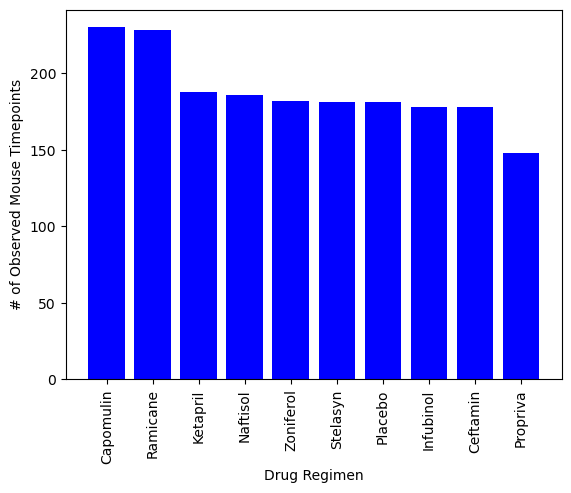

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=np.arange(len(mouse_index_drugs))

plt.bar(x_axis, mouse_index_drugs, color='blue')
plt.xlabel("Drug Regimen") 
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(x_axis, mouse_index_drugs.index, rotation="vertical")
plt.show()

In [80]:
#Determining number of Male Mice in study
m_mice=clean_df[clean_df['Sex'] == 'Male'].count()['Sex']
m_mice

958

In [224]:
#Determining number of Female Mice in study
f_mice=clean_df[clean_df['Sex'] == 'Female'].count()['Sex']
f_mice

922

In [225]:
mouse_gender_pyplot=clean_df['Sex'].value_counts().reset_index()
mouse_gender_pyplot

,Sex,count
0,Male,958
1,Female,922


In [226]:
pypie_chart_val=[mouse_gender_pyplot.iloc[0,1], mouse_gender_pyplot.iloc[1,1]]
pypie_chart_val

[958, 922]

In [84]:
mouse_gender=clean_df['Sex'].value_counts()
mouse_gender

Sex
Male      958
Female    922
Name: count, dtype: int64

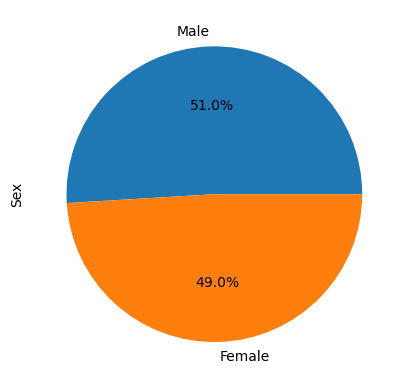

In [228]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender.plot(kind="pie", y='Sex', autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

Text(0, 0.5, 'Sex')

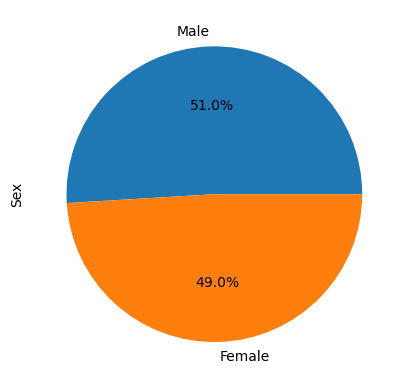

In [229]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pypie_chart_val, labels=["Male", "Female"], autopct='%1.1f%%')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [230]:
tp_last_instance_list=[]
unique_mouse_id_list=[]
iterations=range(0,1880)

for i in iterations:
    unique_mouse_id = clean_df.iloc[i,0]
    umid_rows = clean_df[clean_df['Mouse ID'] == unique_mouse_id]
    tp_last_instance = umid_rows.iloc[umid_rows.shape[0] - 1]['Timepoint']
    tp_last_instance_list.append(tp_last_instance)
    unique_mouse_id_list.append(unique_mouse_id)

In [233]:
lasttp_df = pd.DataFrame({'Mouse ID': unique_mouse_id_list,
              'Timepoint': tp_last_instance_list})
lasttp_df.head()

,Mouse ID,Timepoint
0,b128,45
1,f932,0
2,g107,35
3,a457,10
4,c819,40


In [234]:
new_ltp_df = lasttp_df.drop_duplicates(subset='Mouse ID', keep='first', inplace=False, ignore_index=False)
new_ltp_df.head()

,Mouse ID,Timepoint
0,b128,45
1,f932,0
2,g107,35
3,a457,10
4,c819,40


In [237]:
#Ensuring that all duplicates have been removed. 
from collections import Counter

my_list = new_ltp_df['Mouse ID']
mice_counts = Counter(my_list)

has_duplicates = any(count > 1 for count in mice_counts.values())

if has_duplicates:
    print("Duplicates found")
else:
    print("No duplicates")

No duplicates


In [239]:
#MERGE new_ltp_df with clean_df
merged_clean_df = pd.merge(clean_df, new_ltp_df, on=['Mouse ID', 'Timepoint'], how="inner")
print(merged_clean_df.shape)
merged_clean_df.head(10)

(248, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27
5,d133,0,45.0,0,Zoniferol,Male,5,30
6,l872,0,45.0,0,Placebo,Male,19,30
7,u153,0,45.0,0,Ceftamin,Female,11,25
8,b447,0,45.0,0,Ceftamin,Male,2,30
9,n482,0,45.0,0,Propriva,Female,4,29


In [240]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#Creating an iteration to loop through clean_df by Mouse ID column. 
#Each iteration will collect all timepoints for the ID in current row and then calculate the 
#last instance of timepoint for that ID.Last timepoint gets stored by appending to tp_last_instance_list
#Current row Mouse ID gets stored by appending to unique_mouse_id_list

tp_last_instance_list=[]
unique_mouse_id_list=[]
iterations=range(0,1880)
for i in iterations:
    unique_mouse_id = clean_df.iloc[i,0]
    umid_rows = clean_df[clean_df['Mouse ID'] == unique_mouse_id]
    tp_last_instance = umid_rows.iloc[umid_rows.shape[0] - 1]['Timepoint']
    tp_last_instance_list.append(tp_last_instance)
    unique_mouse_id_list.append(unique_mouse_id)
#Creating new df (lasttp_df), with new lists created above
lasttp_df = pd.DataFrame({'Mouse ID': unique_mouse_id_list,
              'Timepoint': tp_last_instance_list})
#Checking for duplicate mouse IDs and removing them, keeping only first instance in df
new_ltp_df = lasttp_df.drop_duplicates(subset='Mouse ID', keep='first', inplace=False, ignore_index=False)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_clean_df = pd.merge(clean_df, new_ltp_df, on=['Mouse ID', 'Timepoint'], how="inner")
print(merged_clean_df.shape)
merged_clean_df.head(10)

(248, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27
5,d133,0,45.0,0,Zoniferol,Male,5,30
6,l872,0,45.0,0,Placebo,Male,19,30
7,u153,0,45.0,0,Ceftamin,Female,11,25
8,b447,0,45.0,0,Ceftamin,Male,2,30
9,n482,0,45.0,0,Propriva,Female,4,29


In [241]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

#Locate the rows which contain mice on each drug and get the tumor volumes
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drug in drug_list:
    current_tumor_vols_row = merged_clean_df.loc[merged_clean_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
    tumor_vol_data.append(current_tumor_vols_row)
    
# Determine outliers using upper and lower bounds
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for i, drug in enumerate(drug_list):
    quartiles = tumor_vol_data[i].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    print(f"{drug}'s potential outliers: [{lower_bound}, {upper_bound}]")

Capomulin's potential outliers: [20.70456164999999, 51.83201549]
Ramicane's potential outliers: [17.912664470000003, 54.30681135]
Infubinol's potential outliers: [36.83290494999999, 82.74144559000001]
Ceftamin's potential outliers: [25.355449580000002, 87.66645829999999]


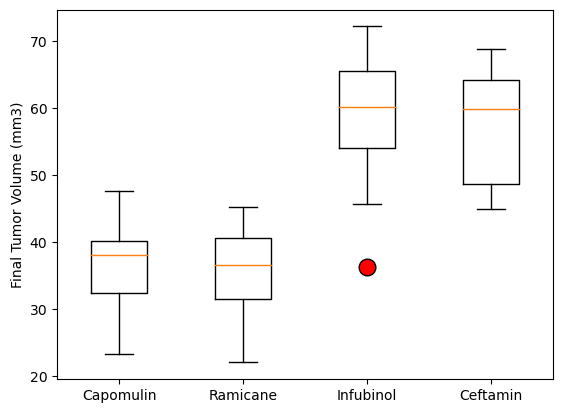

In [242]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
plt.boxplot(tumor_vol_data, labels=drug_list, showmeans=False, flierprops=dict(marker='o', markersize= 12, markerfacecolor='red', markeredgecolor='black'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

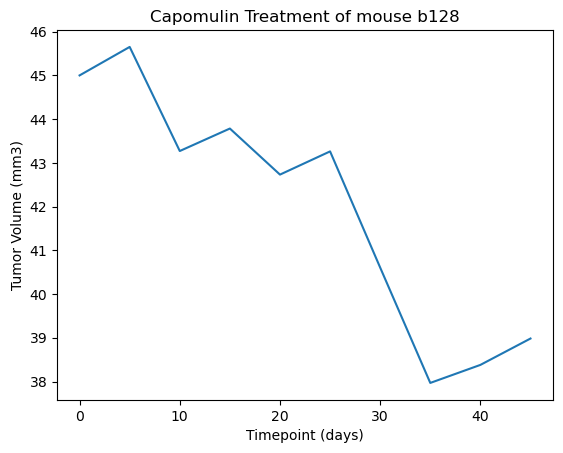

In [248]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
special_mouse_tummor_vol = []
special_mouse_timepoint = []
regimen='Capomulin'
mouse_id='b128'
search_string_list=[regimen, mouse_id]
rslt_df = clean_df[clean_df['Mouse ID'].isin(search_string_list)]

rslt_df.plot(x='Timepoint', y='Tumor Volume (mm3)',xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)', kind='line', title='Capomulin Treatment of mouse b128', legend='')
plt.show()

In [268]:
#In next few steps, use clean study and group by the mouse ID, 
#then find mean of wt, mean of tumor to generate a dataframe containing the 
#mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df_new=clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_df_new.reset_index()
print("Number of times Capomulin was administered: ",capomulin_df_new['Drug Regimen'].value_counts())
capomulin_df_new.head(10)
#Capomulin was the treatment offered most number of times in this study.

Number of times Capomulin was administered:  Drug Regimen
Capomulin    230
Name: count, dtype: int64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21
230,x401,0,45.0,0,Capomulin,Female,16,15
231,l509,0,45.0,0,Capomulin,Male,17,21
232,s710,0,45.0,0,Capomulin,Female,1,23
233,r157,0,45.0,0,Capomulin,Male,22,25
234,u364,0,45.0,0,Capomulin,Male,18,17


In [251]:
#To find the list of unique mice IDs
unique_mice_list=capomulin_df_new['Mouse ID'].unique()
unique_mice_list

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

In [252]:
#Create groups of mouse by their IDs and calculate the mean of wt & tumor vols
avg__wt=[]
avg_tumor_vol=[]

for i in range(0,24):
    curr_mouse_cap_df = capomulin_df_new[capomulin_df_new['Mouse ID'] == unique_mice_list[i]]
    curr_tv_avg = curr_mouse_cap_df['Tumor Volume (mm3)'].mean()
    avg_tumor_vol.append(curr_tv_avg)
    curr_wt_avg = curr_mouse_cap_df['Weight (g)'].mean()
    avg__wt.append(curr_wt_avg)

In [253]:
df_to_plot=pd.DataFrame({'Capomulin Avg. Mouse Wt':avg__wt})
df_to_plot

,Capomulin Avg. Mouse Wt
0,22.0
1,21.0
2,17.0
3,17.0
4,21.0
5,15.0
6,21.0
7,23.0
8,25.0
9,17.0


In [254]:
df_to_plot['Capomulin Tumor Volume (mm3)']=pd.Series(avg_tumor_vol)
df_to_plot

,Capomulin Avg. Mouse Wt,Capomulin Tumor Volume (mm3)
0,22.0,41.963636
1,21.0,43.216925
2,17.0,36.509212
3,17.0,34.559143
4,21.0,40.083699
5,15.0,36.182040
6,21.0,44.434474
7,23.0,42.803733
8,25.0,45.798970
9,17.0,39.887495


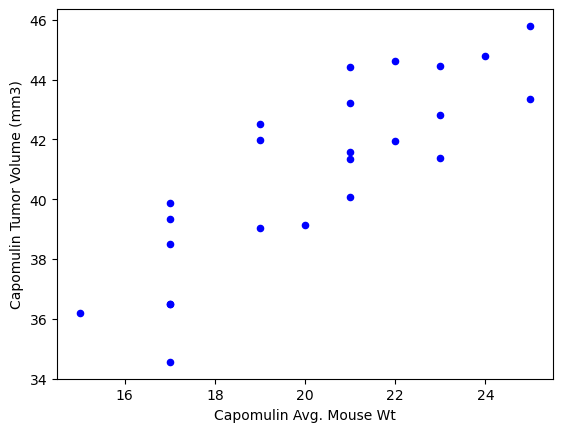

In [256]:
df_to_plot.plot('Capomulin Avg. Mouse Wt', 'Capomulin Tumor Volume (mm3)', kind='scatter', color='blue', marker='o' )
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


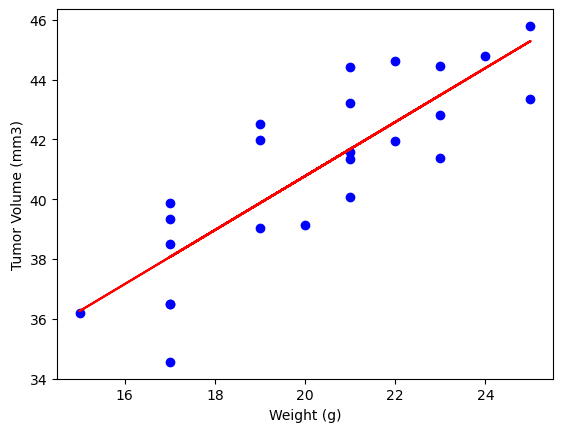

In [257]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = df_to_plot['Capomulin Avg. Mouse Wt']
y_values = df_to_plot['Capomulin Tumor Volume (mm3)']
# x_values = avg__wt
# y_values = avg_tumor_vol

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is: {round(rvalue,2)}")
plt.show()